In [2]:
import Models.process as process
import Models.AIRD as AIRD

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [2]:
pathc = "../Data/Italian Data/"
#pathc="../Data/Covid Tracking State Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
#filename = "CA.csv"
dates, infectRaw, recovRaw, deadRaw = process.loadData(pathc + filename)

dateStart = 150
dateEnd = len(dates)

infectRaw = infectRaw[dateStart:dateEnd]
recovRaw = recovRaw[dateStart:dateEnd]
deadRaw = deadRaw[dateStart:dateEnd]

#recovRaw = process.getRecov(infectRaw, deadRaw)
#infectRaw = process.getCurrentInfect(infectRaw, recovRaw, deadRaw)

pop = 60000000

In [3]:
modelAIRD = AIRD.AIRD() #model class

modelAIRD.setInfections(infectRaw, pop)

In [1]:
modelAIRD.solveVars(eta=.001, delta=.001, w=1, printOut=2)
modelAIRD.graph()

NameError: name 'modelAIRD' is not defined

I(0), A(0): 0.0 2.672118768494254e-06
q: 0.8873414290699344
gamma: [0.0768011  0.02194663]
kappa: 0.08370488450624286
beta: [8.84346846e-02 1.27878260e-01 3.87381886e+02 2.80250036e+00]

None
0.009593758214192307
[0.00000000e+00 2.67211877e-06 8.87341429e-01 7.68011025e-02
 2.19466309e-02 8.37048845e-02 8.84346846e-02 1.27878260e-01
 3.87381886e+02 2.80250036e+00]


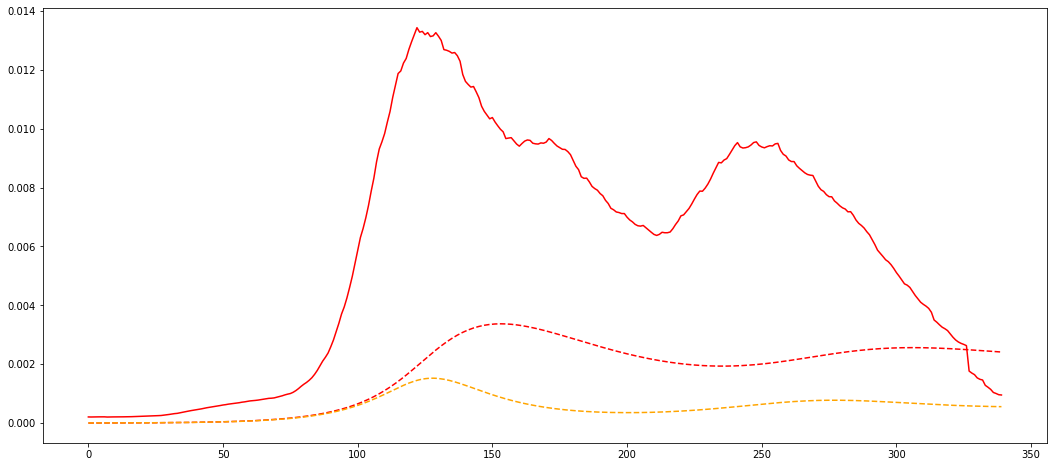

In [9]:
print(modelAIRD.printTheta(modelAIRD.theta))

thetaOrig = np.copy(modelAIRD.theta)
modelAIRD.simulate(thetaOrig, setSelf=True)

modelAIRD.graph(graphA=True)

print(modelAIRD.getError(0))
print(modelAIRD.theta)

0.011644866074023895


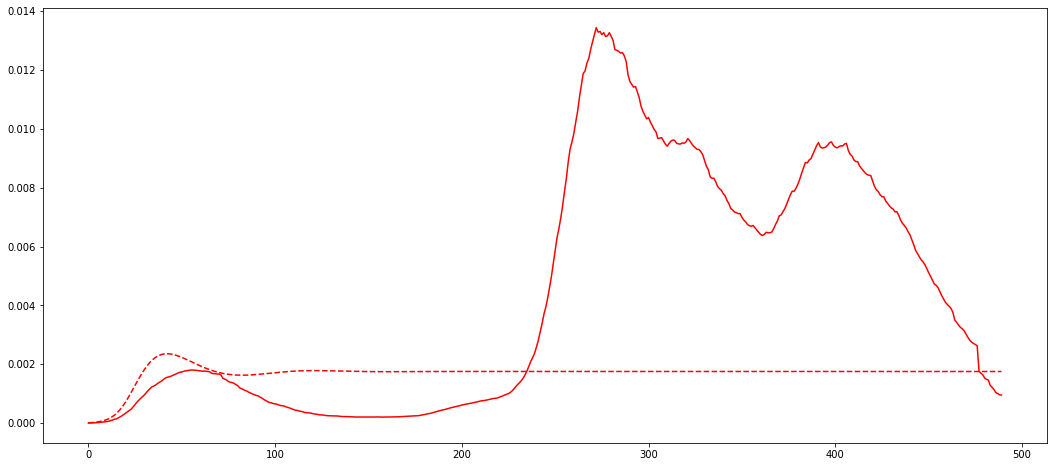

In [6]:
theta = np.copy(modelAIRD.theta)

theta[0] = .00001
theta[1] = .00005

#theta[4] = .08
theta[5] = .1

theta[7] = .4
theta[8] = 850
theta[9] = 1

modelAIRD.simulate(theta, setSelf=True)
modelAIRD.graph(graphA=False)

print(modelAIRD.getError(25))

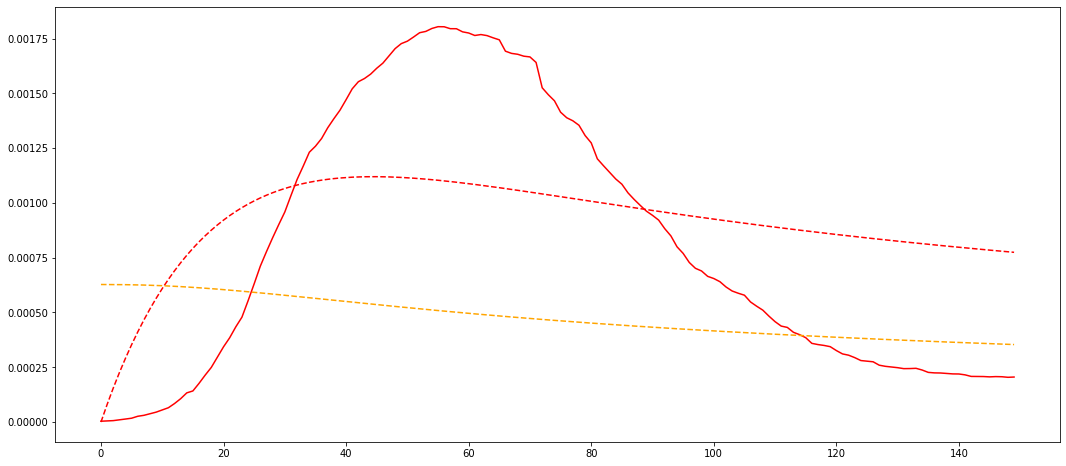

In [38]:
I = np.zeros(np.shape(modelAIRD.actualI))
A = np.zeros(np.shape(modelAIRD.actualI))

I[0] = modelAIRD.theta[0] # I(0)
A[0] = modelAIRD.theta[1] # A(0)
q = modelAIRD.theta[2]
gamma0 = modelAIRD.theta[3] #.009
#gamma0 = 0
gamma1 = modelAIRD.theta[4]
kappa = modelAIRD.theta[5] #.32
#kappa = .02
beta = modelAIRD.theta[6:] #beta0, beta1, beta2, beta3

#iterate the arrays using the definition A' and I'
for t in range(len(I)-1): #define I and A on range [1, length)
    diffA = (beta[0] + (beta[1] / (1 + (beta[2]*I[t])**beta[3] )) ) * (q*A[t])/(q + A[t]) - kappa*A[t] - gamma0*A[t]
    diffI = kappa*A[t] - gamma1*I[t]

    #print(diffA, diffI, A[t], I[t])
    A[t+1] = diffA + A[t]
    I[t+1] = diffI + I[t]
    
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(infectRaw/pop, color="red")
ax.plot(I, color="red", linestyle="dashed")
ax.plot(A, color="orange", linestyle="dashed")

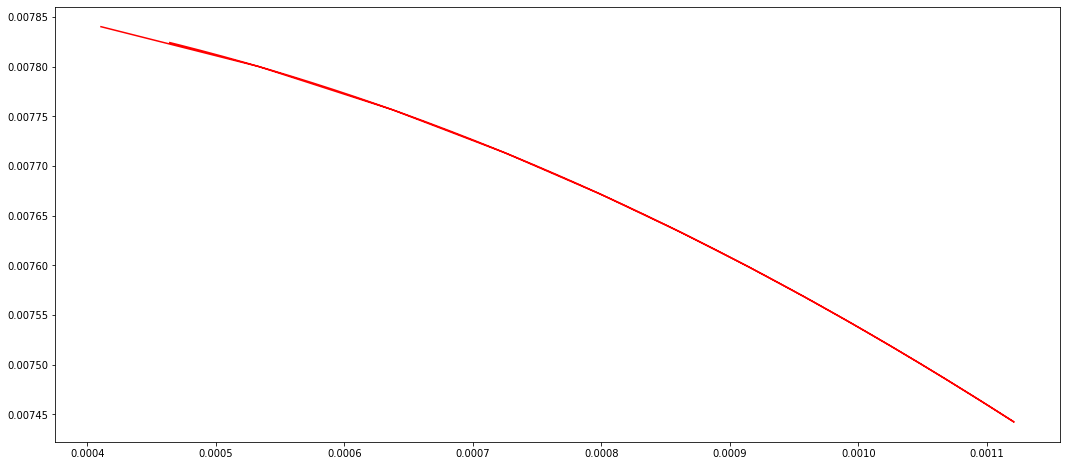

In [49]:
fig2,ax2 = plt.subplots(figsize=(18,8))
ax2.plot(I, beta[0] + (beta[1] / (1 + (beta[2]*I)**beta[3] )), color = "red")

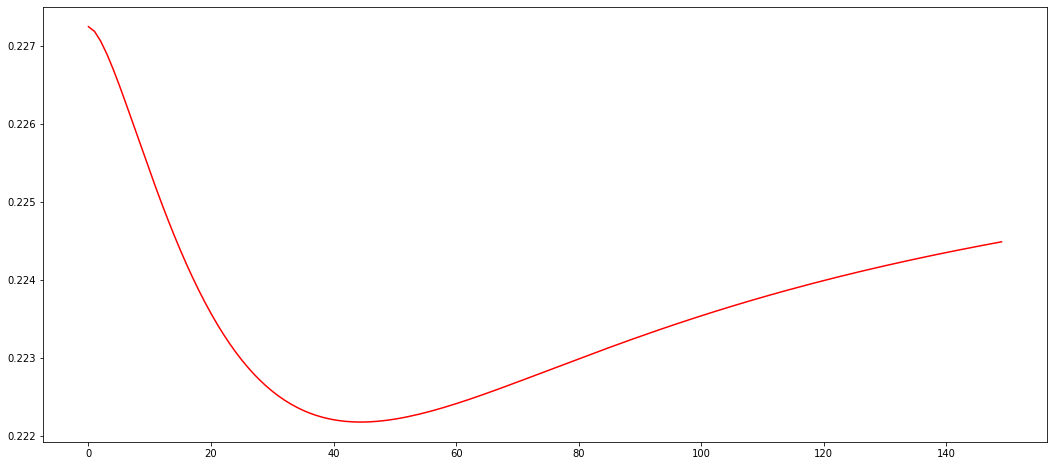

In [39]:
fig2,ax2 = plt.subplots(figsize=(18,8))
ax2.plot(beta[0] + (beta[1] / (1 + (beta[2]*I)**beta[3] )), color = "red")

In [34]:
modelAIRD.theta

array([1.63533448e-03, 6.02129381e-04, 3.43780690e-01, 4.67625392e-02,
       3.67178240e-03, 1.06055796e-01, 0.00000000e+00, 3.96044586e-01,
       3.30645096e+02, 8.09273584e-01])

In [ ]:
# 150 :
#eta=.01, delta=.001, w=0, printOut=2
#[5.86233136e-04 8.50295131e-05 8.95318104e-02 6.44289211e-02
#3.46937956e-03 1.13263095e-01 0.00000000e+00 2.11262670e-01
#9.28259794e+01 3.78088667e+00]
#0.0011530942061094723



#eta=.001, delta=.001, w=0, printOut=2
#[0.00000000e+00 1.38262308e-06 8.87672352e-01 7.10265652e-02
#2.85771889e-03 1.79523376e-01 0.00000000e+00 3.30608072e-01
#1.31192080e+02 5.03616368e+00]
#0.0009214899122584702